# Flat rental prices in Poland

### 1.Libraries

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### 2.Set options

In [2]:
pd.reset_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 3. WebScraping through API (json)

In [3]:
df=pd.DataFrame(columns=['id',
                         'location.city.name',
                         'location.city.normalized_name',
                         'location.district.name',
                         'location.region.name', 
                         'location.region.normalized_name', 
                         'title',
                         'price',
                         'currency',
                         'floor_select',
                         'furniture',
                         'builttype',
                         'm',
                         'rooms',
                         'rent'
                        ])
#Looping in regions
iCounter = 1
for idRegion in range(0,18):
    if idRegion==10 or idRegion==16:
        continue
    
    print('Downloading %i out of 16' % (iCounter))
    # Looping in pages
    jCounter = 0
    for iPage in range(0,1050,50):
        #print(iPage)

        url='https://www.olx.pl/api/v1/offers/?offset=' + \
            str(iPage) + \
            '&limit=49&category_id=15&region_id='+ \
            str(idRegion) + \
            '&filter_refiners=&sl=178c8097095x771d8544'
        #print(url)
        json=pd.read_json(
            url,
            orient='records',
            typ='series'
        )['data']
        
        try:
            if json == []:
                continue
            
            df_temp=pd.json_normalize(
                json)[['id', 
                       'location.city.name',
                       'location.city.normalized_name',
                       'location.district.name',
                       'location.region.name', 
                       'location.region.normalized_name', 
                       'title']]
        except KeyError as err:
            #print(type(err))
            df_temp=pd.json_normalize(
                json)[['id', 
                       'location.city.name',
                       'location.city.normalized_name',
                       'location.region.name', 
                       'location.region.normalized_name', 
                       'title']]
            df_temp['location.district.name'] = np.nan
            jCounter+=1
        except:
            print('Error: ', sys.exc_info()[0])
        
        json2=pd.json_normalize(
            json,
            'params'
        )

        df_temp['price'] = json2.loc[json2.key=='price','value.value'].reset_index(drop=True) #Money for owner
        df_temp['currency'] = json2.loc[json2.key=='price','value.currency'].reset_index(drop=True) #Money for owner
        df_temp['floor_select'] = json2.loc[json2.key=='floor_select','value.label'].reset_index(drop=True) #Floor number
        df_temp['furniture'] = json2.loc[json2.key=='furniture','value.key'].reset_index(drop=True) #Furniture
        df_temp['builttype'] = json2.loc[json2.key=='builttype','value.key'].reset_index(drop=True) #Builttype
        df_temp['m'] = json2.loc[json2.key=='m','value.key'].reset_index(drop=True) #Surface
        df_temp['rooms'] = json2.loc[json2.key=='rooms','value.key'].reset_index(drop=True) #Number of rooms (text, four == four or more)
        df_temp['rent'] = json2.loc[json2.key=='rent','value.key'].reset_index(drop=True) #Rental (additionally paid)

        df=pd.concat([df,df_temp], ignore_index = True)
        
    print("\tDownloaded offers:", df.count()['id'])
    print("\tMissing districts in current region:", jCounter)
    iCounter+=1

df = df.drop_duplicates()
print('Process finished')

	Downloaded offers: 1343
	Missing districts in current region: 0
	Downloaded offers: 2677
	Missing districts in current region: 0
	Downloaded offers: 4009
	Missing districts in current region: 0
	Downloaded offers: 5337
	Missing districts in current region: 0
	Downloaded offers: 6668
	Missing districts in current region: 0
	Downloaded offers: 8001
	Missing districts in current region: 0
	Downloaded offers: 9328
	Missing districts in current region: 0
	Downloaded offers: 10661
	Missing districts in current region: 0
	Downloaded offers: 11991
	Missing districts in current region: 21
	Downloaded offers: 12425
	Missing districts in current region: 8
	Downloaded offers: 13758
	Missing districts in current region: 0
	Downloaded offers: 14193
	Missing districts in current region: 1
	Downloaded offers: 14890
	Missing districts in current region: 12
	Downloaded offers: 15884
	Missing districts in current region: 16
	Downloaded offers: 17211
	Missing districts in current region: 21
	Downloaded o

In [4]:
df.describe()

,price
count,17534.000
mean,2863.525
std,51892.794
min,1.000
25%,1380.000
50%,1800.000
75%,2500.000
max,6666667.000


In [5]:
filename = datetime.now().strftime('%Y') + '_flat_rental.csv'
#print(filename)
df.to_csv(filename, index=False, encoding='utf-8')

In [6]:
df.head(10)

,id,location.city.name,location.city.normalized_name,location.district.name,location.region.name,location.region.normalized_name,title,price,currency,floor_select,furniture,builttype,m,rooms,rent
0,770104907,Józefosław,jozefoslaw,NaN,Mazowieckie,mazowieckie,Nowoczesne mieszkanie 53 m2 w Józefosławiu,4100.000,PLN,1,yes,blok,53.7,three,1
1,723647085,Żary,zary,NaN,Lubuskie,lubuskie,Zadbane mieszkanie w dobrej lokalizacji (Zwycięzców) w Żarach,1800.000,PLN,2,yes,blok,51,three,360
2,769175049,Bydgoszcz,bydgoszcz,NaN,Kujawsko-pomorskie,kujawsko-pomorskie,"Wynajmę kawalerkę wolne od 15.08.2022 r. Wyżyny, ul. Ogrody Bydgoszcz",1200.000,PLN,Parter,yes,blok,31.6,one,380
3,741883341,Lublin,lublin,NaN,Lubelskie,lubelskie,"Mieszkanie 3-pokojowe, Wieniawa, po remoncie, ul. Puławska",2100.000,PLN,1,yes,blok,50,three,400
4,770496801,Nowa Sól,nowa-sol,NaN,Lubuskie,lubuskie,Mieszkanie samotnemu Panu wynajmę .,1600.000,PLN,2,yes,wolnostojacy,44,two,123456
5,767522038,Kraków,krakow,Stare Miasto,Małopolskie,malopolskie,135 m w sercu Krakowa / Idealne na biuro,7500.000,PLN,1,yes,kamienica,135,three,500
6,680138591,Bielsko-Biała,bielsko-biala,NaN,Śląskie,slaskie,"Dwupokojowe mieszkanie w doskonałej lokalizacji, Bielsko-Biała",1800.000,PLN,8,yes,apartamentowiec,40,two,370
7,761418469,Warszawa,warszawa,Mokotów,Mazowieckie,mazowieckie,"Mokotów 48m2 ( Galeria Mokotów, Wołoska ) - Bezpośrednio",2600.000,PLN,1,yes,blok,48,two,600
8,770496596,Rybnik,rybnik,NaN,Śląskie,slaskie,Wynajmę M3 69 m,1000.000,PLN,3,no,kamienica,69,two,800
9,767644962,Olsztyn,olsztyn,NaN,Warmińsko-mazurskie,warminsko-mazurskie,Mieszkanie do wynajęcia,1400.000,PLN,Parter,yes,blok,37,two,500


### 4. Data cleaning

In [7]:
df.dtypes

id                                  object
location.city.name                  object
location.city.normalized_name       object
location.district.name              object
location.region.name                object
location.region.normalized_name     object
title                               object
price                              float64
currency                            object
floor_select                        object
furniture                           object
builttype                           object
m                                   object
rooms                               object
rent                                object
dtype: object

In [8]:
df['m']=df['m'].astype('float64')
df['rent']=df['rent'].astype('float64')

In [9]:
df['location.region.name'].drop_duplicates().count()

16

##### Looking for missing data in records

In [10]:
for col in df.columns:
    print(col, np.mean(df[col].isna())*100, '%')

id 0.0 %
location.city.name 0.0 %
location.city.normalized_name 0.0 %
location.district.name 60.58514885365576 %
location.region.name 0.0 %
location.region.normalized_name 0.0 %
title 0.0 %
price 0.0 %
currency 0.0 %
floor_select 4.0150564617314926 %
furniture 0.017109615603969428 %
builttype 0.022812820805292573 %
m 0.022812820805292573 %
rooms 0.022812820805292573 %
rent 11.241017451807917 %


In [11]:
df[df['price']>10000]

,id,location.city.name,location.city.normalized_name,location.district.name,location.region.name,location.region.normalized_name,title,price,currency,floor_select,furniture,builttype,m,rooms,rent
101,770486919,Września,wrzesnia,NaN,Wielkopolskie,wielkopolskie,Świeżo wyremontowane mieszkanie 3-pokojowe Września 49 mkw,310000.000,PLN,1,no,blok,49.000,three,340.000
334,768167022,Zabrze,zabrze,NaN,Śląskie,slaskie,mieszkanie Zaborze ul. Leszczynowa,249000.000,PLN,2,no,blok,53.600,three,435.000
386,768586848,Zielona Góra,zielonagora,NaN,Lubuskie,lubuskie,Mieszkanie Apartament Locum Botanica 77m2- 3 sypialnie z dużym tarasem,698500.000,PLN,1,no,apartamentowiec,77.000,four,550.000
464,770461573,Sanok,sanok,NaN,Podkarpackie,podkarpackie,"Sprzedam Mieszkanie Wójtostwo Sanok ul, Kopernika 48,60 m2",305000.000,PLN,3,no,blok,48.600,three,500.000
524,767544957,Kraków,krakow,Stare Miasto,Małopolskie,malopolskie,LUX || Salwator || penthouse200 m2 || Kościuszki||,12000.000,PLN,6,yes,apartamentowiec,200.000,four,1500.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16394,762017788,Brodnica,brodnica,NaN,Kujawsko-pomorskie,kujawsko-pomorskie,2 pokojowe mieszkanie na sprzedaż lub do wynajecia,203000.000,PLN,3,no,blok,47.700,two,400.000
16967,768224758,Mogilno,mogilno,NaN,Kujawsko-pomorskie,kujawsko-pomorskie,Zamienię mieszkanie,123456.000,PLN,3,no,pozostale,58.000,three,1.000
17222,770461573,Sanok,sanok,NaN,Podkarpackie,podkarpackie,"Sprzedam Mieszkanie Wójtostwo Sanok ul, Kopernika 48,60 m2",305000.000,PLN,4,no,blok,48.600,three,650.000
17668,768907326,Rzeszów,rzeszow,NaN,Podkarpackie,podkarpackie,3 pokojowe mieszkanie blisko centrum miasta i uczelni,369000.000,PLN,2,yes,blok,53.000,three,400.000


In [12]:
df[df['price']<500]

,id,location.city.name,location.city.normalized_name,location.district.name,location.region.name,location.region.normalized_name,title,price,currency,floor_select,furniture,builttype,m,rooms,rent
76,762039836,Kraków,krakow,Łagiewniki-Borek Fałęcki,Małopolskie,malopolskie,Wynajem krótkoterminowy,140.000,PLN,Parter,yes,wolnostojacy,30.000,one,1.000
98,769088514,Gdańsk,gdansk,Brzeźno,Pomorskie,pomorskie,mieszkanie na wakacje,250.000,PLN,2,yes,blok,33.000,two,650.000
99,746281788,Mikołajki,mikolajki_120501,NaN,Warmińsko-mazurskie,warminsko-mazurskie,Apartament Ptasia Mikołajki,350.000,PLN,4,yes,blok,48.000,two,246.000
226,770476707,Mory,mory_139063,NaN,Mazowieckie,mazowieckie,Mieszkanie 30 m 200 zł za dobę,200.000,PLN,8,yes,kamienica,30.000,one,480.000
234,528598693,Częstochowa,czestochowa,Błeszno,Śląskie,slaskie,POKOJE dla Pracowników BLESZNO Найм жилья/ночлеги для работников есть,450.000,PLN,6,yes,wolnostojacy,12.000,one,300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17878,769948286,Uherce Mineralne,uherce-mineralne,NaN,Podkarpackie,podkarpackie,Do wynajęcia Apartament położony w miejscowości Uherce Mineralne,350.000,PLN,4,yes,apartamentowiec,100.000,three,450.000
17943,767139458,Sanok,sanok,NaN,Podkarpackie,podkarpackie,Pokoje na wynajem,70.000,PLN,3,yes,wolnostojacy,100.000,four,640.000
17987,766728729,Sanok,sanok,NaN,Podkarpackie,podkarpackie,Mieszkanie do wynajęcia w Sanoku dla studentów.,450.000,PLN,2,yes,blok,34.000,two,1200.000
17995,766672809,Rzeszów,rzeszow,NaN,Podkarpackie,podkarpackie,wynajem mieszkania,400.000,PLN,2,yes,blok,53.000,two,1.000


In [13]:
df[df['m']>100] 

,id,location.city.name,location.city.normalized_name,location.district.name,location.region.name,location.region.normalized_name,title,price,currency,floor_select,furniture,builttype,m,rooms,rent
5,767522038,Kraków,krakow,Stare Miasto,Małopolskie,malopolskie,135 m w sercu Krakowa / Idealne na biuro,7500.000,PLN,1,yes,kamienica,135.000,three,500.000
65,770371456,Gdańsk,gdansk,Aniołki,Pomorskie,pomorskie,Mieszkanie 2 pokojowe Gdansk Osowa Klukowo,850.000,PLN,Parter,yes,wolnostojacy,400.000,two,1.000
144,764570506,Kolonia Brużyca,kolonia-bruzyca,NaN,Łódzkie,lodzkie,"Wyjątkowy Apartament Spa z sauną, jacuzzi, ogrodem i dwoma tarasami.",5900.000,PLN,10,yes,pozostale,129.000,four,490.000
263,770476947,Kraków,krakow,Krowodrza,Małopolskie,malopolskie,"ENG| ul. Krowoderska, 116m2, 3 pok, balkon",5400.000,PLN,2,yes,kamienica,116.000,three,1.000
481,761687893,Kraków,krakow,Stare Miasto,Małopolskie,malopolskie,Kraków - Stare Miasto - ul. Felicjanek,8000.000,PLN,1,yes,kamienica,144.000,four,1600.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,770012228,Dębica,debica,NaN,Podkarpackie,podkarpackie,TG development wynajmie mieszkania i pokoje w super lokalizacji bezopł,500.000,PLN,1,yes,wolnostojacy,500.000,one,600.000
17886,630356924,Dębica,debica,NaN,Podkarpackie,podkarpackie,TG development wynajmie pokoje-super warunki opłaty w cenie!!,500.000,PLN,6,yes,wolnostojacy,250.000,four,200.000
17941,770012228,Dębica,debica,NaN,Podkarpackie,podkarpackie,TG development wynajmie mieszkania i pokoje w super lokalizacji bezopł,500.000,PLN,1,yes,wolnostojacy,500.000,one,450.000
18170,770012228,Dębica,debica,NaN,Podkarpackie,podkarpackie,TG development wynajmie mieszkania i pokoje w super lokalizacji bezopł,500.000,PLN,Parter,yes,wolnostojacy,500.000,one,NaN


In [14]:
#Probably 'rooms for rent' assign to wrong category
df[df['m']<15] 

,id,location.city.name,location.city.normalized_name,location.district.name,location.region.name,location.region.normalized_name,title,price,currency,floor_select,furniture,builttype,m,rooms,rent
129,769500512,Łódź,lodz,Śródmieście,Łódzkie,lodzkie,Kawalerka w centrum Łodzi - Jaracza. W pełni wyposażona,1400.000,PLN,3,yes,blok,14.000,one,210.000
168,692288232,Bydgoszcz,bydgoszcz,NaN,Kujawsko-pomorskie,kujawsko-pomorskie,Kawalerka po remoncie - super lokalizacja!,1199.000,PLN,1,yes,kamienica,13.770,one,250.000
234,528598693,Częstochowa,czestochowa,Błeszno,Śląskie,slaskie,POKOJE dla Pracowników BLESZNO Найм жилья/ночлеги для работников есть,450.000,PLN,6,yes,wolnostojacy,12.000,one,300.000
244,758740123,Katowice,katowice,Śródmieście,Śląskie,slaskie,Pokoj na ul.Barbary - centralne ogrzewanie i woda,750.000,PLN,6,yes,kamienica,10.000,four,3000.000
381,769066559,Gliwice,gliwice,Szobiszowice,Śląskie,slaskie,Mieszkanie na wynajem Gliwice ul. Nasyp 2,1050.000,PLN,NaN,yes,kamienica,11.000,one,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17920,721137527,Rzeszów,rzeszow,NaN,Podkarpackie,podkarpackie,Przytulny pokój 14m- ZALESIE od zaraz,520.000,PLN,4,yes,blok,14.000,four,600.000
17962,766904474,Rzeszów,rzeszow,NaN,Podkarpackie,podkarpackie,Mam do wynajęcia pokój,750.000,PLN,2,yes,blok,13.000,one,NaN
17978,769597891,Rzeszów,rzeszow,NaN,Podkarpackie,podkarpackie,"Kawalerka mini 14m2 1050 zł. z czynszem, Rzeszów, Kolbego",1050.000,PLN,5,yes,blok,14.000,one,400.000
18106,769597891,Rzeszów,rzeszow,NaN,Podkarpackie,podkarpackie,"Kawalerka mini 14m2 1050 zł. z czynszem, Rzeszów, Kolbego",1050.000,PLN,1,yes,blok,14.000,one,186.000


In [15]:
# Checking how great is percentage of wrongly assigned 'rooms for rent'
df[df['m']<15].count()['id'] / df.count()['id']*100

1.066499372647428

In [16]:
df['rooms'].unique()

array(['three', 'one', 'two', 'four', nan], dtype=object)

In [17]:
rooms_dict={'one':1,'two':2,'three':3,'four':4, np.nan:np.nan}

rooms=[]
for index, row in df.iterrows():
    rooms.append(rooms_dict[row['rooms']])
df['rooms'] = rooms

In [18]:
df['city_district'] = df['location.city.name'] + ', ' + df['location.district.name']
df['m2_price'] = df['price'] / df['m']
df['room_price'] = df['price'] / df['rooms']
df['total_cost'] = df['price'] + df['rent']
df['m2_total_cost'] = df['total_cost'] / df['m']

##### Looking for way to filter-out short-term rental offers as well as flats' sell offers.

In [19]:
#Short-term rental (or extremely low price)
df.sort_values(by='m2_total_cost').head(10)

,id,location.city.name,location.city.normalized_name,location.district.name,location.region.name,location.region.normalized_name,title,price,currency,floor_select,furniture,builttype,m,rooms,rent,city_district,m2_price,room_price,total_cost,m2_total_cost
11964,756791164,Ulhówek,ulhowek,NaN,Lubelskie,lubelskie,Wynajmę mieszkanie m3,800.000,PLN,3,yes,blok,603003.000,2.000,350.000,NaN,0.001,400.000,1150.000,0.002
4493,769994252,Kłodzko,klodzko,NaN,Dolnośląskie,dolnoslaskie,Mieskzniae wynajem,1500.000,PLN,2,no,pozostale,111111.000,2.000,500.000,NaN,0.014,750.000,2000.000,0.018
2659,768918827,Trzcianka,trzcianka,NaN,Wielkopolskie,wielkopolskie,Mieszkanie dla jednej osoby,500.000,PLN,4,yes,blok,11111.000,2.000,450.000,NaN,0.045,250.000,950.000,0.086
12870,769703224,Goleniów,goleniow,NaN,Zachodniopomorskie,zachodniopomorskie,Pokój 2 i 4 osobowy w doskonałej lokalizacji*Pokoje*Noclegi*Goleniów,35.000,PLN,Parter,yes,kamienica,90.000,2.000,1.000,NaN,0.389,17.500,36.000,0.400
17354,770150998,Rzeszów,rzeszow,NaN,Podkarpackie,podkarpackie,Wynajmę mieszkanie 2 pokojowe na okres sierpnia i września,1000.000,PLN,4,yes,blok,3055.000,2.000,403.000,NaN,0.327,500.000,1403.000,0.459
4529,658524654,Brzeg Dolny,brzeg-dolny,NaN,Dolnośląskie,dolnoslaskie,Kwatery pracownicze wynajm,30.000,PLN,1,yes,blok,48.000,2.000,1.000,NaN,0.625,15.000,31.000,0.646
5196,588671400,Jelenia Góra,jelenia-gora,Centrum,Dolnośląskie,dolnoslaskie,"Жильё в частном доме,Jelenia Gòra,без посредников",700.000,PLN,1,yes,wolnostojacy,900.000,4.000,1.000,"Jelenia Góra, Centrum",0.778,175.000,701.000,0.779
17710,770012228,Dębica,debica,NaN,Podkarpackie,podkarpackie,TG development wynajmie mieszkania i pokoje w super lokalizacji bezopł,500.000,PLN,Parter,yes,wolnostojacy,500.000,1.000,1.000,NaN,1.000,500.000,501.000,1.002
4980,767304734,Wrocław,wroclaw,Krzyki,Dolnośląskie,dolnoslaskie,"Mieszkanie do wynajęcia na sesje zdjęciowe, nagrania filmowe",70.000,PLN,9,yes,apartamentowiec,63.000,3.000,1.000,"Wrocław, Krzyki",1.111,23.333,71.000,1.127
12712,653021664,Szczecin,szczecin,Centrum,Zachodniopomorskie,zachodniopomorskie,Kawalerka 30m2 w Hanza Tower w dużą loggią 5m2.,3000.000,PLN,4,yes,apartamentowiec,2985.000,1.000,470.000,"Szczecin, Centrum",1.005,3000.000,3470.000,1.162


In [20]:
#Flat's sell offers
df.sort_values(by='m2_total_cost',ascending=False).head(10)

,id,location.city.name,location.city.normalized_name,location.district.name,location.region.name,location.region.normalized_name,title,price,currency,floor_select,furniture,builttype,m,rooms,rent,city_district,m2_price,room_price,total_cost,m2_total_cost
1629,765567812,Poznań,poznan,Winogrady,Wielkopolskie,wielkopolskie,Wygodna kawalerka z balkonem w nowym Rezerwacja,2000.000,PLN,Parter,yes,pozostale,25.000,1.000,609531063.000,"Poznań, Winogrady",80.000,2000.000,609533063.000,24381322.520
1058,770419722,Warszawa,warszawa,Śródmieście,Mazowieckie,mazowieckie,Kawalerka przy Nowym Świecie,2200.000,PLN,3,yes,kamienica,26.000,1.000,400200400.000,"Warszawa, Śródmieście",84.615,2200.000,400202600.000,15392407.692
8115,767302722,Zabrze,zabrze,NaN,Śląskie,slaskie,Komfortowo wyposażony apartamnet; super lokalizacja; parking,1550.000,PLN,1,yes,apartamentowiec,33.000,1.000,400200400.000,NaN,46.970,1550.000,400201950.000,12127331.818
8597,699747323,Bytom,bytom,NaN,Śląskie,slaskie,Wynnajme Mieszkanie Bytom Konstytucji ( Bobrek ),1100.000,PLN,1,yes,kamienica,40.000,2.000,123456789.000,NaN,27.500,550.000,123457889.000,3086447.225
12247,658695777,Sulęcin,sulecin,NaN,Lubuskie,lubuskie,Mieszkanie do wynajęcia,2100.000,PLN,1,yes,blok,60.000,3.000,111111111.000,NaN,35.000,700.000,111113211.000,1851886.850
3697,770085197,Warszawa,warszawa,Bemowo,Mazowieckie,mazowieckie,Mieszkanie za gotówkę,380000.000,PLN,Parter,yes,blok,1.000,2.000,400.000,"Warszawa, Bemowo",380000.000,190000.000,380400.000,380400.000
15041,732943662,Iława,ilawa,NaN,Warmińsko-mazurskie,warminsko-mazurskie,Kameralne mieszkanie w centrum miasta,1200.000,PLN,Parter,yes,blok,30.000,2.000,11111111.000,NaN,40.000,600.000,11112311.000,370410.367
16331,769835666,Nowa Wieś Wielka,nowa-wies-wielka_69401,NaN,Kujawsko-pomorskie,kujawsko-pomorskie,Wynajem mieszkania,111111.000,PLN,Parter,yes,wolnostojacy,68.000,2.000,11111111.000,NaN,1633.985,55555.500,11222222.000,165032.676
15042,770112658,Giżycko,gizycko,NaN,Warmińsko-mazurskie,warminsko-mazurskie,Mieszkanie do wynajecia,6666667.000,PLN,2,no,blok,57.000,3.000,300.000,NaN,116959.070,2222222.333,6666967.000,116964.333
8208,770372745,Gliwice,gliwice,Stare Gliwice,Śląskie,slaskie,"Apartament wysoki standard ""Miasto Ogród""",2300.000,PLN,4,yes,apartamentowiec,40.000,2.000,1234567.000,"Gliwice, Stare Gliwice",57.500,1150.000,1236867.000,30921.675


In [21]:
# Checking how great is percentage of wrongly assigned 'Apartments for sell'
df[df['m2_total_cost']>150].count()['id']/df.count()['id']*100

1.0265769362381658

In [22]:
#Which region does have the highest number of flats' sell offers in wrong category?
df[df['m2_total_cost']>150].groupby('location.region.name').count()['id'].sort_values(ascending=False)

location.region.name
Pomorskie              23
Mazowieckie            22
Wielkopolskie          22
Warmińsko-mazurskie    15
Śląskie                15
Zachodniopomorskie     13
Dolnośląskie           11
Lubelskie              11
Małopolskie            11
Łódzkie                10
Podkarpackie            9
Lubuskie                7
Kujawsko-pomorskie      6
Świętokrzyskie          3
Opolskie                2
Name: id, dtype: int64

In [23]:
#Which city does have the highest number of flats' sell offers in wrong category?
df[df['m2_total_cost']>150].groupby('location.city.name').count()['id'].sort_values(ascending=False).head(10)

location.city.name
Warszawa    21
Poznań      12
Kraków      11
Wrocław      9
Gdańsk       9
Łódź         7
Gdynia       6
Szczecin     6
Rzeszów      5
Lublin       5
Name: id, dtype: int64

In [24]:
# Checking how great is percentage of wrongly assigned 'Short-term rental'
df.loc[(df['m2_total_cost']<10) & (df['price']<600)].count()['id']/df.count()['id']*100

0.8383711645945022

In [25]:
#Which REGION does have the highest number of short-term offers?
df.loc[(df['m2_total_cost']<10) & (df['price']<600)].groupby('location.region.name').count()['id'].sort_values(ascending=False)

location.region.name
Pomorskie              37
Zachodniopomorskie     24
Warmińsko-mazurskie    17
Podkarpackie           14
Lubelskie              13
Małopolskie            11
Dolnośląskie            8
Wielkopolskie           5
Śląskie                 5
Opolskie                4
Łódzkie                 4
Kujawsko-pomorskie      3
Mazowieckie             1
Świętokrzyskie          1
Name: id, dtype: int64

In [26]:
#Which CITY does have the highest number of short-term offers?
df.loc[(df['m2_total_cost']<10) & (df['price']<600)].groupby('location.city.name').count()['id'].sort_values(ascending=False).head(15)

location.city.name
Kołobrzeg           10
Gdańsk               7
Ustka                6
Giżycko              6
Dębica               6
Wrocław              4
Zamość               4
Opole                3
Uherce Mineralne     3
Gdynia               3
Kraków               3
Łeba                 3
Nałęczów             3
Łąkta Górna          3
Mrągowo              3
Name: id, dtype: int64

In [27]:
# Dropping-out all wrongly assigned offers
df = df.loc[(df['m2_total_cost']>10) & (df['price']>600) & (df['m2_total_cost']<150)]

In [28]:
df.describe()

,price,m,rooms,rent,m2_price,room_price,total_cost,m2_total_cost
count,14774.000,14774.000,14774.000,14774.000,14774.000,14774.000,14774.000,14774.000
mean,2082.938,47.413,2.060,389.466,46.843,1102.505,2472.403,56.106
std,1133.579,27.745,0.791,386.008,19.248,532.456,1215.844,22.551
min,620.000,8.000,1.000,0.010,5.714,157.500,626.000,10.012
25%,1400.000,35.000,2.000,150.000,32.653,750.000,1750.000,40.000
50%,1900.000,45.000,2.000,370.000,43.786,1000.000,2250.000,52.525
75%,2500.000,55.000,3.000,500.000,58.065,1369.250,2901.000,68.605
max,25000.000,1150.000,4.000,12345.000,143.750,12500.000,25382.000,149.040


### 6. Charts and analytics

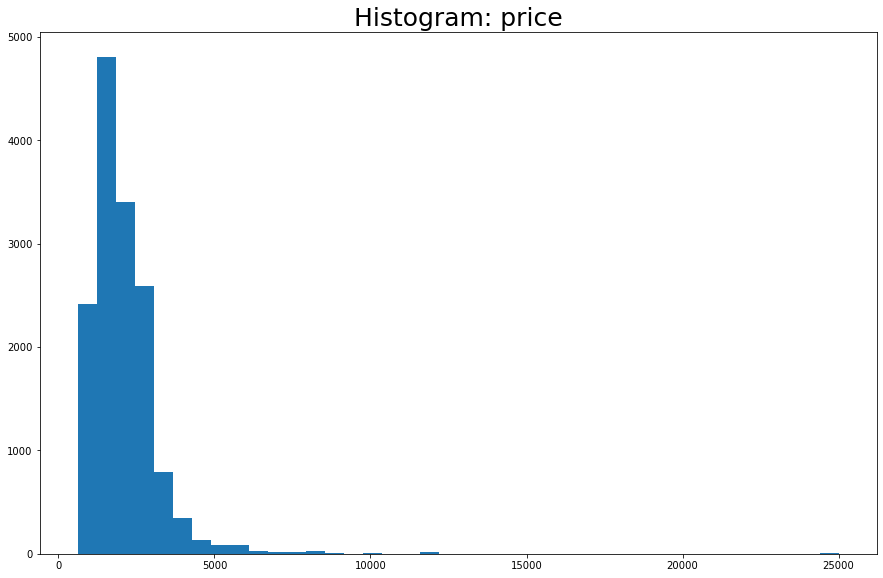

In [29]:
X=df['price']
fig_1, axes = plt.subplots(1,1, figsize=(15,9.6))

ax1 = axes.hist(X,bins=40)

axes.set_title('Histogram: price', size=25)
plt.show()

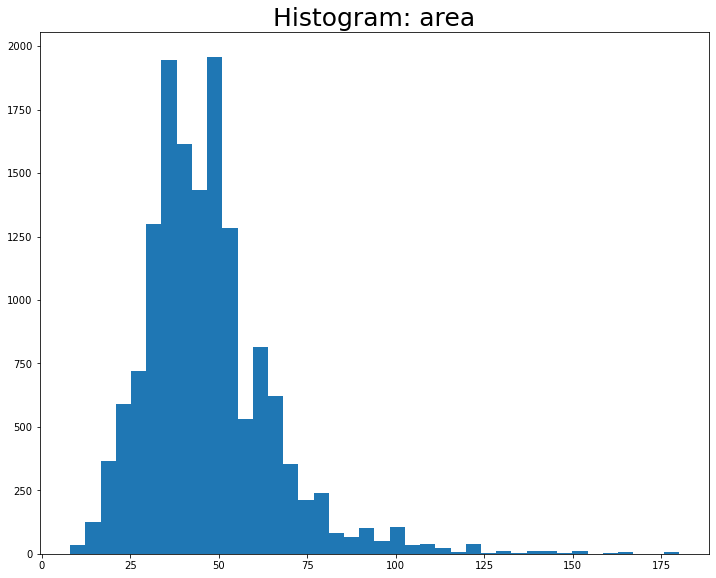

In [30]:
#X=df['m']
X=df.loc[df['m']<200, 'm']
fig_1, axes = plt.subplots(1,1, figsize=(12,9.6))

ax1 = axes.hist(X,bins=40)
axes.set_title('Histogram: area', size=25)
plt.show()

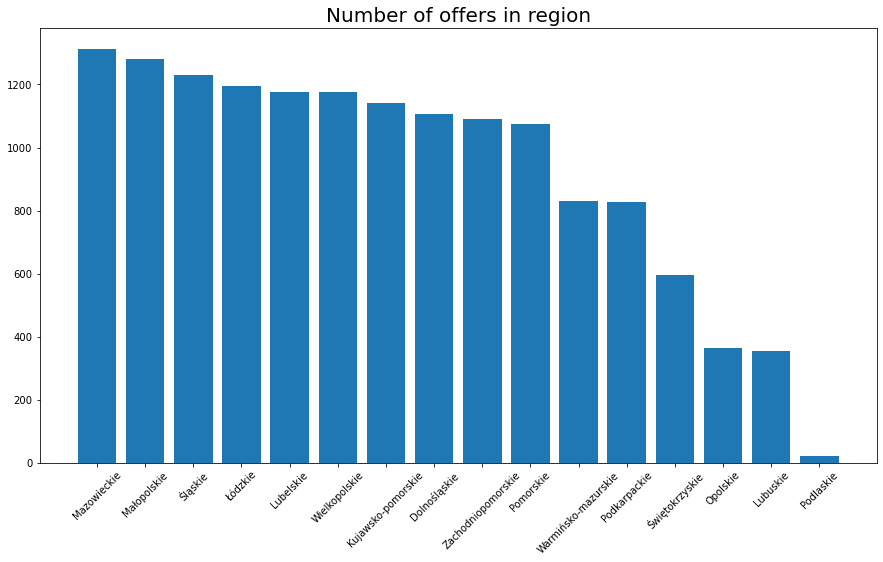

In [31]:
h=df.groupby(by='location.region.name').count()['id'].sort_values(ascending=False)
X = h.index

fig_1, axes = plt.subplots(1,1, figsize=(15,8))

ax1 = axes.bar(X, height=h)
axes.tick_params(axis='x', labelrotation = 45)

axes.set_title('Number of offers in region', size=20)
plt.show()

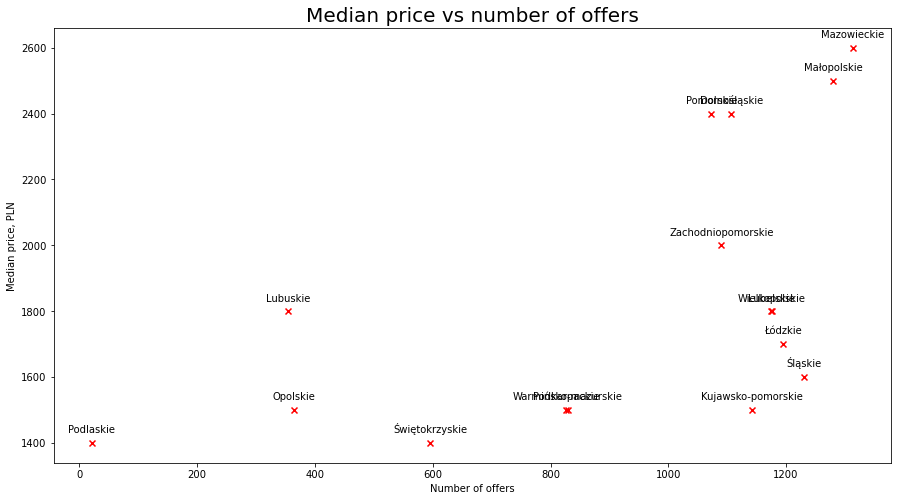

In [32]:
X=df.groupby(by='location.region.name').count()['id']
Y=df.groupby('location.region.name').median()['price']
texts=X.index

fig_1, axes = plt.subplots(1,1, figsize=(15,8))

ax1 = axes.scatter(X,Y,marker='x', color='red')

axes.set_xlabel('Number of offers')
axes.set_ylabel('Median price, PLN')
axes.set_title('Median price vs number of offers', size=20)

# zip joins x and y coordinates in pairs
for x,y,txt in zip(X,Y,texts):

    label = txt

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

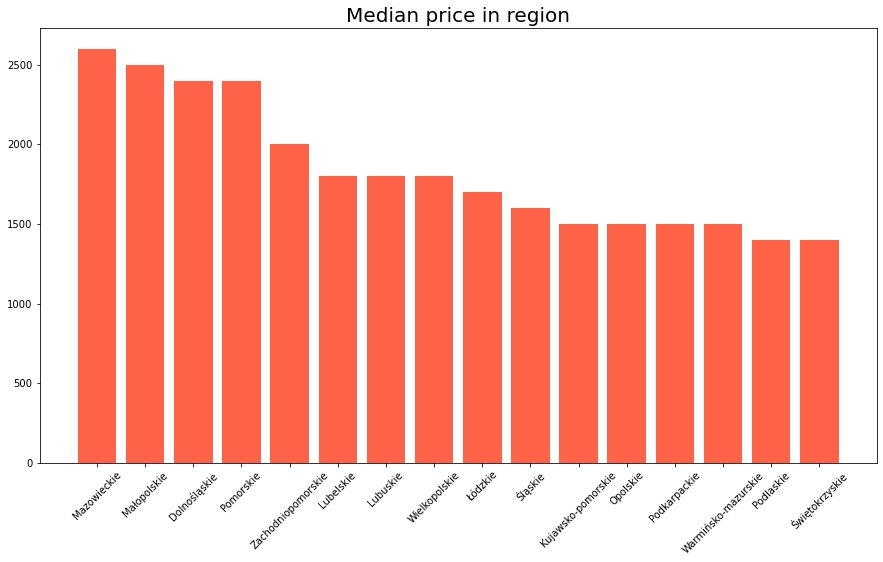

In [33]:
h=df.groupby('location.region.name').median()['price'].sort_values(ascending=False)

X = h.index

fig_1, axes = plt.subplots(1,1, figsize=(15,8))

ax1 = axes.bar(X, height=h, color='tomato')
axes.tick_params(axis='x', labelrotation = 45)

axes.set_title('Median price in region', size=20)
plt.show()

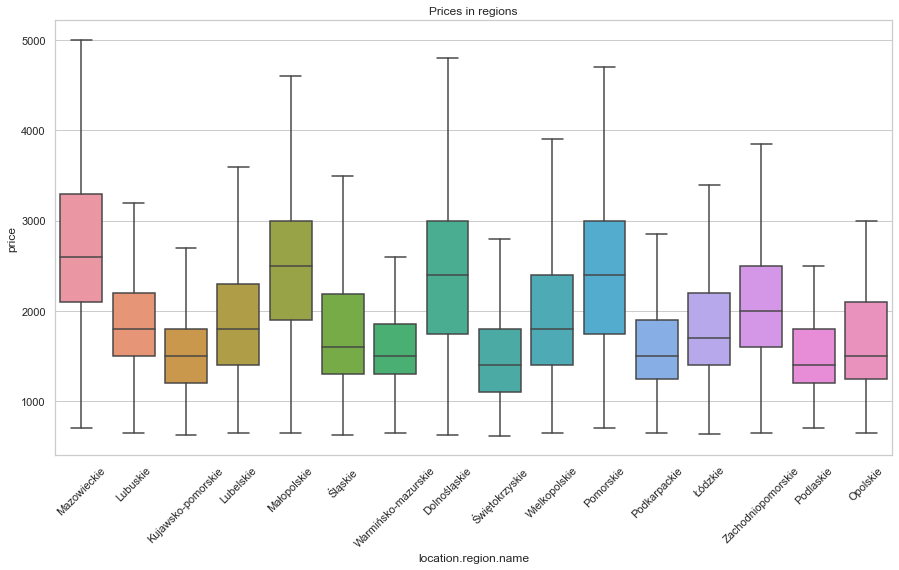

In [34]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")
ax1=sns.boxplot(y=df['price'], x=df['location.region.name'], showfliers = False).set(title='Prices in regions')
plt.xticks(rotation=45)
plt.show()

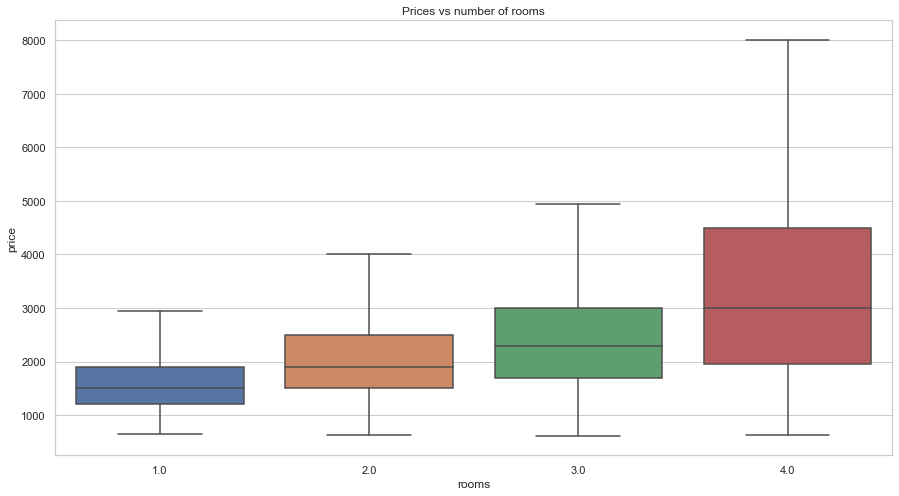

In [35]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")
ax1=sns.boxplot(y=df['price'], x=df['rooms'], showfliers = False).set(title='Prices vs number of rooms')
plt.show()

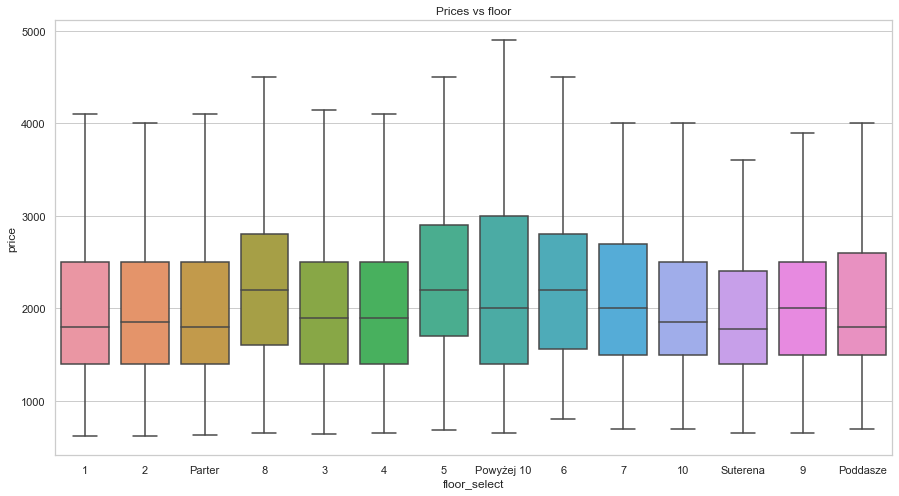

In [36]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")
ax1=sns.boxplot(y=df['price'], x=df['floor_select'], showfliers = False).set(title='Prices vs floor')
plt.show()

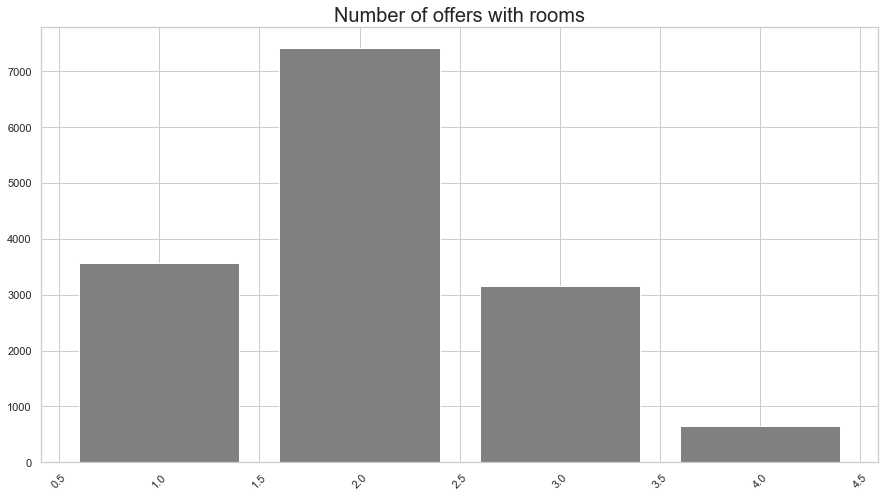

In [37]:
h=df.groupby('rooms').count()['id'].sort_values(ascending=False)

X = h.index

fig_1, axes = plt.subplots(1,1, figsize=(15,8))

ax1 = axes.bar(X, height=h, color='grey')
axes.tick_params(axis='x', labelrotation = 45)

axes.set_title('Number of offers with rooms', size=20)
plt.show()

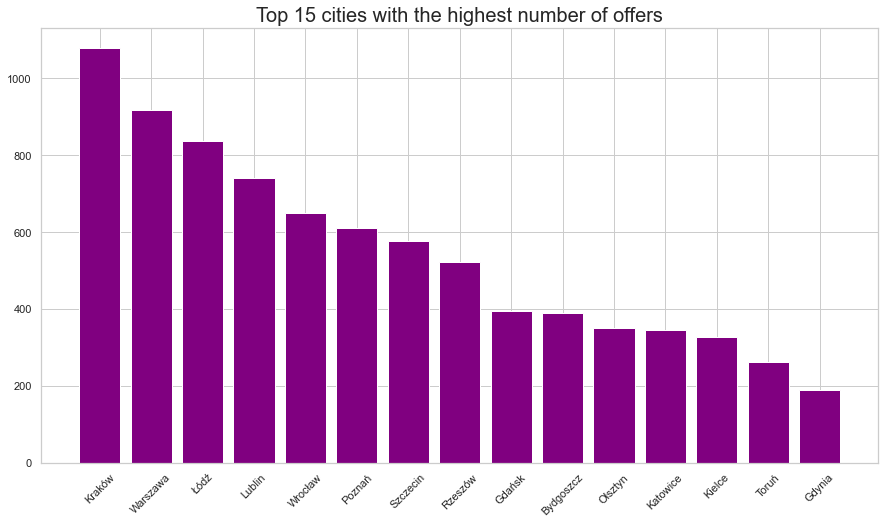

In [38]:
h = df.groupby(['location.city.name']).count()['location.city.normalized_name'].sort_values(ascending=False).head(15)

X = h.index

fig_1, axes = plt.subplots(1,1, figsize=(15,8))

ax1 = axes.bar(X, height=h, color='purple')
axes.tick_params(axis='x', labelrotation = 45)

axes.set_title('Top 15 cities with the highest number of offers', size=20)
plt.show()

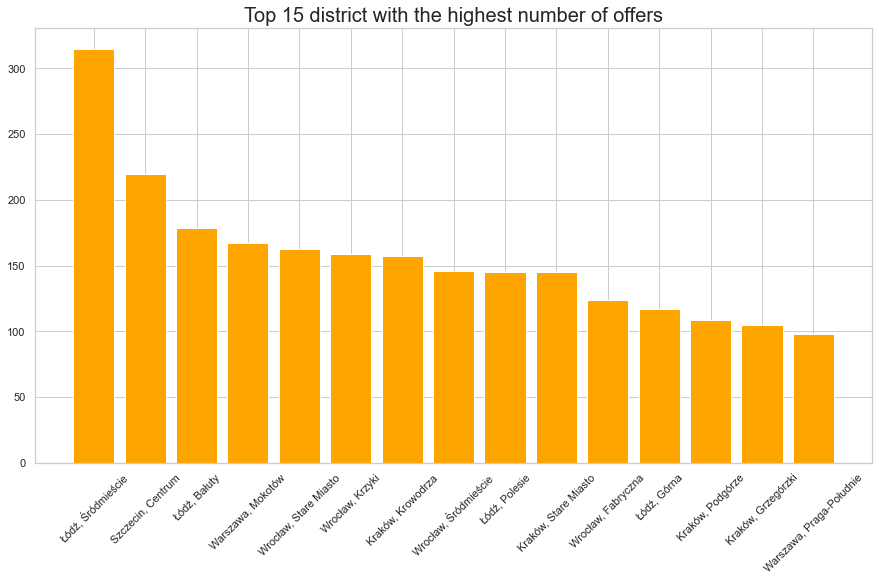

In [39]:
h = df.groupby(['city_district']).count()['location.city.normalized_name'].sort_values(ascending=False).head(15)

X = h.index

fig_1, axes = plt.subplots(1,1, figsize=(15,8))

ax1 = axes.bar(X, height=h, color='orange')
axes.tick_params(axis='x', labelrotation = 45)

axes.set_title('Top 15 district with the highest number of offers', size=20)

plt.show()

In [40]:
df.groupby(['location.city.name']).median().sort_values(by='price', ascending=False).head(20)

,price,m,rooms,rent,m2_price,room_price,total_cost,m2_total_cost
location.city.name,,,,,,,,
Mostki,12000.000,200.000,4.000,500.000,60.000,3000.000,12500.000,62.500
Mechelinki,8000.000,108.000,4.000,750.000,74.074,2000.000,8750.000,81.019
Kolonia Brużyca,5900.000,129.000,4.000,490.000,45.736,1475.000,6390.000,49.535
Kolbuszowa,5500.000,62.500,2.500,415.000,69.841,1916.667,5915.000,77.333
Serock,5500.000,110.000,3.000,2500.000,50.000,1833.333,8000.000,72.727
...,...,...,...,...,...,...,...,...
Wierzchowie,4000.000,78.000,4.000,700.000,51.282,1000.000,4700.000,60.256
Mokry Dwór,3900.000,70.500,3.500,148.500,53.024,1066.667,4048.500,54.626
Kobierzyce,3700.000,52.000,3.000,300.000,71.154,1233.333,4000.000,76.923


In [41]:
df.groupby(['location.city.name']).median().sort_values(by='m2_price', ascending=False).head(20)

,price,m,rooms,rent,m2_price,room_price,total_cost,m2_total_cost
location.city.name,,,,,,,,
Makowisko,1200.000,10.000,2.000,1.000,120.000,600.000,1201.000,120.100
Pęczniew,2000.000,20.000,1.000,350.000,100.000,2000.000,2350.000,117.500
Rząska,1700.000,18.000,1.000,1.000,94.444,1700.000,1701.000,94.500
Zemborzyce Podleśne,1700.000,19.000,1.000,1.000,89.474,1700.000,1701.000,89.526
Andrespol,1850.000,22.000,1.000,1.000,84.091,1850.000,1851.000,84.136
...,...,...,...,...,...,...,...,...
Nowy Dwór,2000.000,28.000,1.000,1200.000,71.429,2000.000,3200.000,114.286
Kobierzyce,3700.000,52.000,3.000,300.000,71.154,1233.333,4000.000,76.923
Sopot,2300.000,47.000,2.000,450.000,70.000,2000.000,2750.000,77.000


#### Looking for the most expensive cities (with more than 10 offers)

In [42]:
df1 = df.groupby(['location.city.name']).count()['id']
df1=df1[df1>10]

In [43]:
df2 = df.merge(df1, on=['location.city.name','location.city.name'], how='left',indicator=True)
df2 = df2[df2['_merge']=='both']

In [44]:
df2.groupby(['location.city.name']).median().sort_values(by='m2_price', ascending=False).head(20)

,price,m,rooms,rent,m2_price,room_price,total_cost,m2_total_cost,id_y
location.city.name,,,,,,,,,
Sopot,2300.000,47.000,2.000,450.000,70.000,2000.000,2750.000,77.000,69.000
Gdańsk,3000.000,44.500,2.000,400.000,69.444,1500.000,3400.000,78.182,395.000
Warszawa,2900.000,44.250,2.000,396.500,69.444,1500.000,3300.000,77.500,918.000
Grodzisk Mazowiecki,2200.000,33.000,1.000,80.000,66.667,2000.000,2620.000,70.868,12.000
Świnoujście,2900.000,44.000,2.000,400.000,66.667,1500.000,3240.000,72.000,29.000
...,...,...,...,...,...,...,...,...,...
Zielonka,2725.000,49.500,2.000,450.000,53.240,1500.000,2975.000,57.224,12.000
Rumia,2400.000,45.500,2.000,400.000,52.628,1050.000,2675.000,62.222,30.000
Poznań,2200.000,45.000,2.000,373.850,50.000,1100.000,2501.000,59.048,610.000


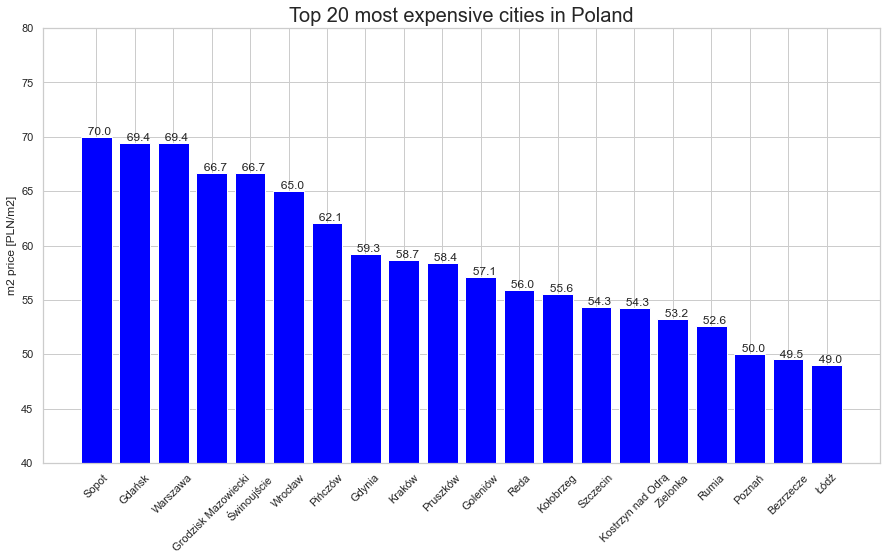

In [48]:
h = df2.groupby(['location.city.name']).median().sort_values(by='m2_price', ascending=False).head(20)['m2_price']

X = h.index

fig_1, axes = plt.subplots(1,1, figsize=(15,8))

ax1 = axes.bar(X, height=h, color='blue')
axes.tick_params(axis='x', labelrotation = 45)
axes.set_ylabel('m2 price [PLN/m2]')

axes.set_title('Top 20 most expensive cities in Poland', size=20)
axes.bar_label(ax1, fmt="%6.1f")
axes.set_ylim(40,80)

plt.show()